# 모델 개요

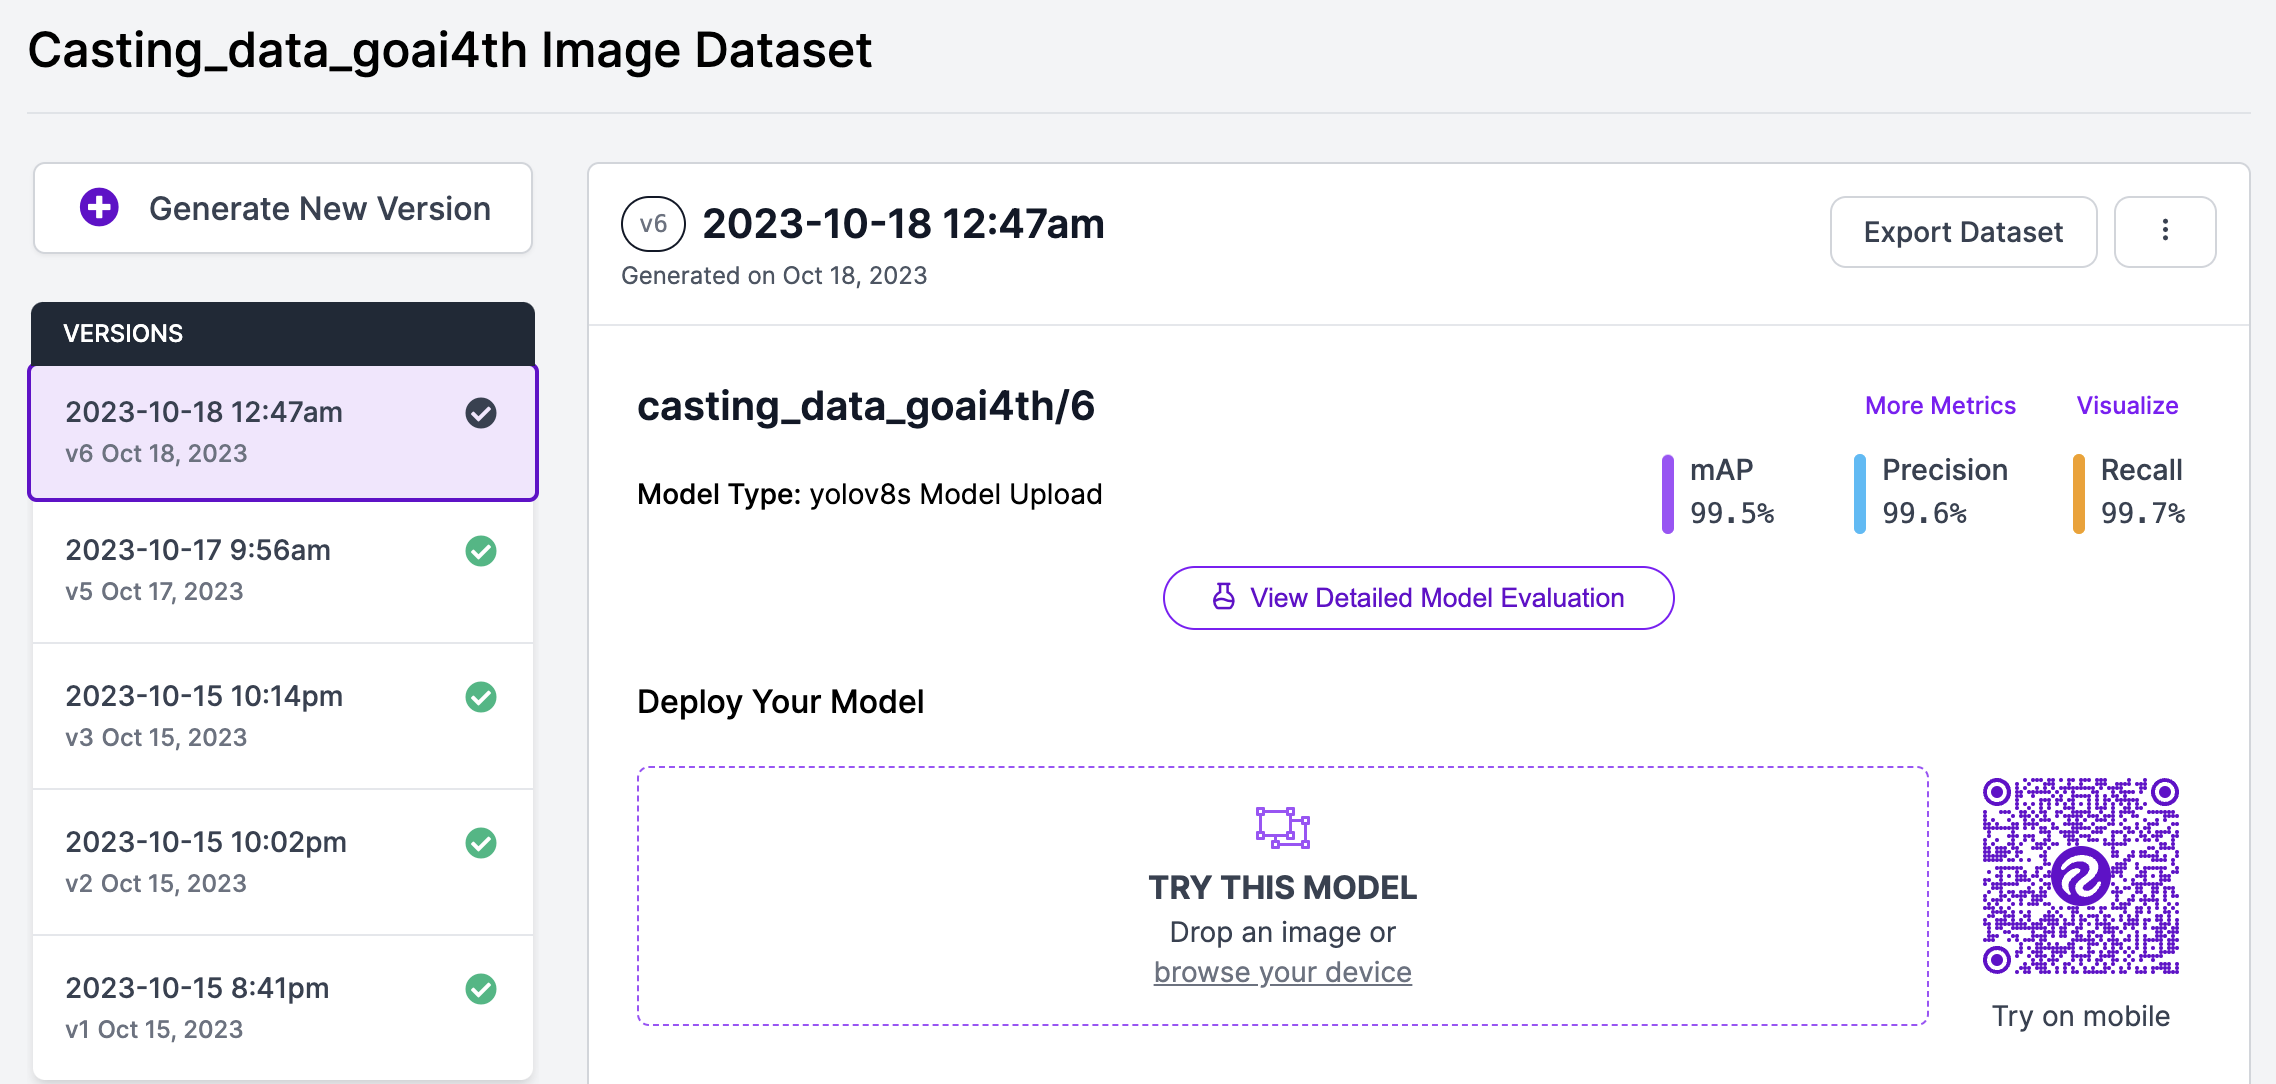

# 데이터 가져오기

https://app.roboflow.com/goai4thprojectobjectdetection/casting_data_goai4th/6

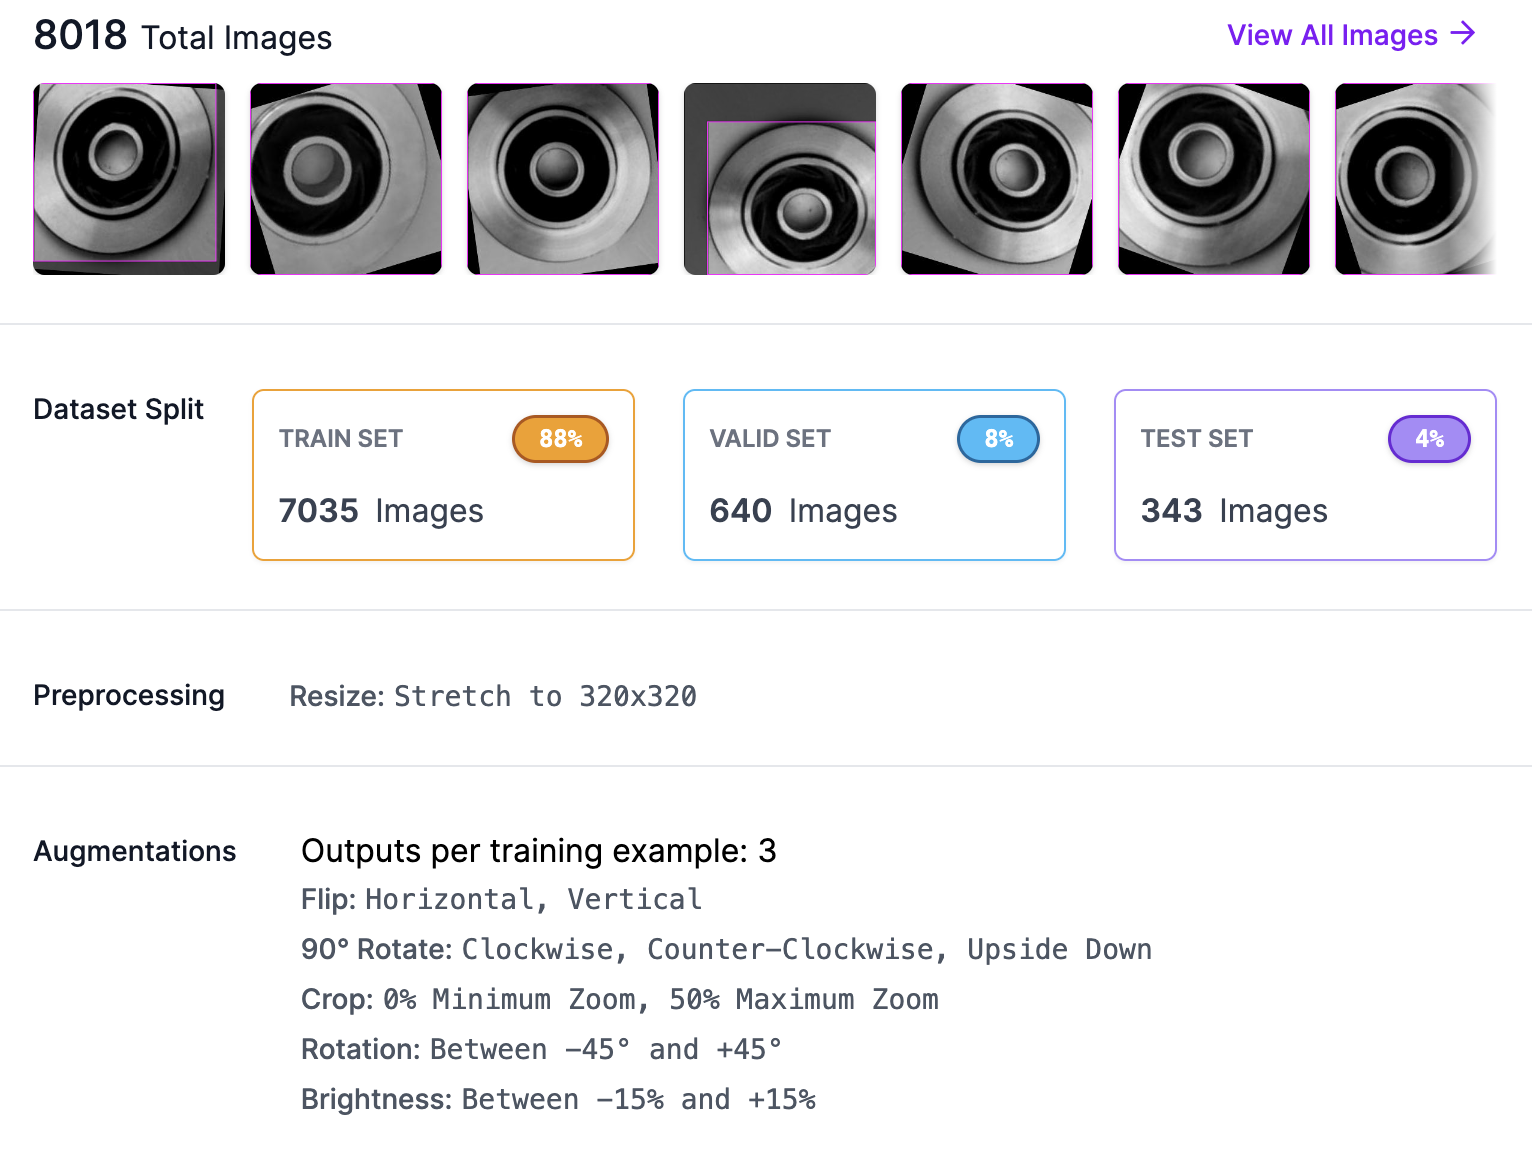

In [1]:
from IPython.display import clear_output

%pip install roboflow
clear_output()

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# ROBOFLOW API로 모델 불러오기

In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.getenv("ROBOFLOW_REF_MODEL_API")

In [3]:
# set model

from roboflow import Roboflow
rf = Roboflow(API_KEY)
project = rf.workspace().project("casting_data_goai4th")
model = project.version(6).model

loading Roboflow workspace...
loading Roboflow project...


In [4]:
# Inference - whole
def inference(path):
  result = model.predict(path, confidence=40, overlap=1)
  display(result.json())
  return result

In [5]:
# Inference class id, x
def inference(path):
  temp = model.predict(path, confidence=40, overlap=1)
  result = []
  # if len(temp.json()['predictions']):
  for idx in range(len(temp.json()['predictions'])):
    temp_dict = {'x':temp.json()['predictions'][idx]['x'],
                 'y':temp.json()['predictions'][idx]['y'],
                'class_id':temp.json()['predictions'][idx]['class_id']}
    result.append(temp_dict)

  return result

In [6]:
# FUNCTIONS
import os.path
from glob import glob
import cv2
import os
import shutil


# Path Vaildation
def check_path(path):
  if os.path.isfile(path):
    return "file"
  elif os.path.isdir(path):
    return "directory"
  elif os.path.exists(path):
    return "something"
  else :
    return "Nothing"


# Inference Directory
def inference_directory(directory):
  files = glob(directory + '/*')
  # 확장자를 지정하여 가져오는 경우 files = glob(directory + '/*.'+확장자(인수로 받아오기))
  files = sorted(files)
  results = []

  for file in files:
      results.append(inference(file))
  return results


# Extract Frames
def extract_frames(video_path):
  if check_path(video_path) != "file":
    print("Check the file path")
    return

  name = input("Enter new directory name: ")
  video = cv2.VideoCapture(video_path)
  frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  video_frame_path = '/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing'  # 현재 디렉토리

  # dir
  if not os.path.exists(video_frame_path):
    os.mkdir(video_frame_path)
  # %cd video_frame_path
  if os.path.exists(f'{name}'):
    shutil.rmtree(f'{name}', ignore_errors=True)
    os.mkdir(f'{name}')
    print(f'{video_frame_path}/{name} dir is recreated')
  if not os.path.exists(f'{name}'):
    os.mkdir(f'{name}')
    print(f'{video_frame_path}/{name} dir is created')

  # save
  for i in range(frame_count):
      ret, frame = video.read()
      if ret:
          image_path = f"{name}/frame_{'{:04d}'.format(i)}.jpg"
          cv2.imwrite(image_path, frame)

  print('frames extracted')

  video.release()
  print(f"{video_frame_path}/{name}  비디오 추출 완료")
  return f"{video_frame_path}/{name}"


# get image/directory/video path and inference
def inference_path(path):

  if check_path(path) == "file":
    if os.path.splitext(path)[1].lower() in ['.bmp', '.dng', '.jpeg', '.jpg', '.mpo', '.png', '.tif', '.tiff', '.webp', '.pfm']:
      return inference(path)

    elif os.path.splitext(path)[1].lower() in ['.asf', '.avi', '.gif', '.m4v', '.mkv', '.mov', '.mp4', '.mpeg', '.mpg', '.ts', '.wmv', '.webm']:
      video_frame_path = extract_frames(path)
      return inference_directory(video_frame_path)

    else: print("Check the file type")

  elif check_path(path) == "directory":
    return inference_directory(path)

  else:
    print("Check the file path")
    return

In [7]:
def check_writable(directory):
    return os.access(directory, os.W_OK)

# dir_to_be_tested = video_frame_path
dir_to_be_tested = '/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing'

if check_writable(dir_to_be_tested):
    print(f"{dir_to_be_tested} is writable")
else:
    print(f"Warning: {dir_to_be_tested} is not writable")

/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing is writable


# TEST

In [8]:
# =====test=====
print("No 1. 없는 경로")
inference_path("test/test2")


No 1. 없는 경로
Check the file path


In [9]:
# =====test=====
print("No 2. 이미지 파일")
data = inference_path("test/test/cast_def_0_1007_jpeg_jpg.rf.d02fd82d4644192af8cfceb4136233ba.jpg")
print(data)

No 2. 이미지 파일
[{'x': 107.5, 'y': 111.5, 'class_id': 0}]


In [10]:
# =====test=====
print("No 3. 이미지 폴더")
datas=inference_path("test/test")
datas

No 3. 이미지 폴더


[[{'x': 107.5, 'y': 111.5, 'class_id': 0}],
 [{'x': 219.5, 'y': 133.5, 'class_id': 0}],
 [{'x': 89.0, 'y': 100.5, 'class_id': 0}],
 [{'x': 95.5, 'y': 109.0, 'class_id': 0}],
 [{'x': 105.5, 'y': 112.0, 'class_id': 0}],
 [{'x': 107.0, 'y': 116.5, 'class_id': 0}],
 [{'x': 86.5, 'y': 110.5, 'class_id': 0}],
 [{'x': 121.5, 'y': 113.0, 'class_id': 1}],
 [{'x': 88.5, 'y': 123.0, 'class_id': 1},
  {'x': 230.5, 'y': 112.5, 'class_id': 1}],
 [],
 [{'x': 98.5, 'y': 103.5, 'class_id': 1},
  {'x': 102.0, 'y': 242.0, 'class_id': 1}],
 [{'x': 101.5, 'y': 111.0, 'class_id': 1}],
 [{'x': 103.5, 'y': 101.5, 'class_id': 1}],
 [{'x': 234.0, 'y': 113.0, 'class_id': 1}],
 [{'x': 231.0, 'y': 111.5, 'class_id': 1}]]

In [44]:
# =====test=====
print("No 4-1. 동영상 ")
video_result = inference_path("test/test5_short.mp4")
video_result

No 4. 동영상 
/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing/video_inf dir is created
frames extracted
/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing/video_inf  비디오 추출 완료


[[{'x': 217, 'y': 367, 'class_id': 0},
  {'x': 671, 'y': 372, 'class_id': 0},
  {'x': 296, 'y': 92, 'class_id': 0}],
 [{'x': 664, 'y': 372, 'class_id': 0},
  {'x': 210, 'y': 366, 'class_id': 0},
  {'x': 246, 'y': 92, 'class_id': 0}],
 [{'x': 656, 'y': 372, 'class_id': 0},
  {'x': 201, 'y': 367, 'class_id': 0},
  {'x': 178, 'y': 94, 'class_id': 0}],
 [{'x': 646, 'y': 372, 'class_id': 0},
  {'x': 192, 'y': 366, 'class_id': 0},
  {'x': 175, 'y': 93, 'class_id': 0}],
 [{'x': 637, 'y': 372, 'class_id': 0},
  {'x': 182, 'y': 366, 'class_id': 0},
  {'x': 170, 'y': 93, 'class_id': 0}],
 [{'x': 628, 'y': 372, 'class_id': 0},
  {'x': 173, 'y': 366, 'class_id': 0},
  {'x': 257, 'y': 91, 'class_id': 0}],
 [{'x': 620, 'y': 372, 'class_id': 0},
  {'x': 167, 'y': 367, 'class_id': 0},
  {'x': 162, 'y': 92, 'class_id': 0},
  {'x': 975, 'y': 375, 'class_id': 0}],
 [{'x': 612, 'y': 372, 'class_id': 0},
  {'x': 157, 'y': 366, 'class_id': 0},
  {'x': 156, 'y': 93, 'class_id': 0},
  {'x': 971, 'y': 377, 'cl

In [45]:
# =====test=====
print("No 4-2. 동영상 ")
video_result = inference_path("test/test5.mp4")
video_result

No 4-2. 동영상 
/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing/vid_test dir is created
frames extracted
/Users/leeshinhee/Documents/newdeal/project/CloudAiProject_team1_preprocessing/vid_test  비디오 추출 완료


[[{'x': 217, 'y': 367, 'class_id': 0},
  {'x': 671, 'y': 372, 'class_id': 0},
  {'x': 296, 'y': 92, 'class_id': 0}],
 [{'x': 664, 'y': 372, 'class_id': 0},
  {'x': 210, 'y': 366, 'class_id': 0},
  {'x': 246, 'y': 92, 'class_id': 0}],
 [{'x': 656, 'y': 372, 'class_id': 0},
  {'x': 201, 'y': 367, 'class_id': 0},
  {'x': 178, 'y': 94, 'class_id': 0}],
 [{'x': 646, 'y': 372, 'class_id': 0},
  {'x': 192, 'y': 366, 'class_id': 0},
  {'x': 175, 'y': 93, 'class_id': 0}],
 [{'x': 637, 'y': 372, 'class_id': 0},
  {'x': 182, 'y': 366, 'class_id': 0},
  {'x': 170, 'y': 93, 'class_id': 0}],
 [{'x': 628, 'y': 372, 'class_id': 0},
  {'x': 173, 'y': 366, 'class_id': 0},
  {'x': 257, 'y': 91, 'class_id': 0}],
 [{'x': 620, 'y': 372, 'class_id': 0},
  {'x': 167, 'y': 367, 'class_id': 0},
  {'x': 162, 'y': 92, 'class_id': 0},
  {'x': 975, 'y': 375, 'class_id': 0}],
 [{'x': 612, 'y': 372, 'class_id': 0},
  {'x': 157, 'y': 366, 'class_id': 0},
  {'x': 156, 'y': 93, 'class_id': 0},
  {'x': 971, 'y': 377, 'cl